## Outline
1. Problem description
2. Import libraries
3. Upload Datasets
4. Understanding the Data
5. Data Cleaning
6. feature Engineering
7. Train The Model

### Problem Description
- We need to predict the final price of a residential homes in Ames, Iowa given its attributes.

- People buy houses to satisfy a certain need or a set of needs. It could be a combination of space for kids, procimity to schools, prestige etc. The more people are looking for a certain feature to satisfy their need the more the demand, that pushes the price to go high and vice versa. For every house that was sold we want to determine how important each feature was and how much did it impact the price.

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


### Upload The Datasets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Understanding our Data

In [4]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [6]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# lets understand our target variable sale price
# descrptive stats of price

train ['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

No missing price, max 755,000 min 43,900 In real life we can say that its a great difference

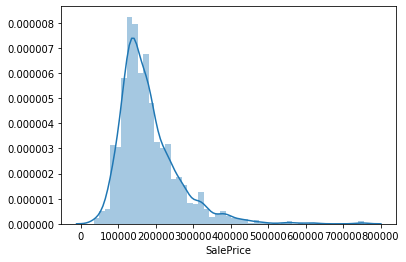

In [10]:
sns.distplot(train['SalePrice']);

The price is skewed to the left, with most home prices being btwn 50000 and 300,000, 500,000 and above are replecented by a smaller population.

In [11]:
# what is the relationship between the price and the rest of the features
# Is there a correlation
# Perform correlation

corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Some of of the top corr features: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd Least corr includes: YrSold

Lets do a scatter plot of the features most corr to price for a better fiew

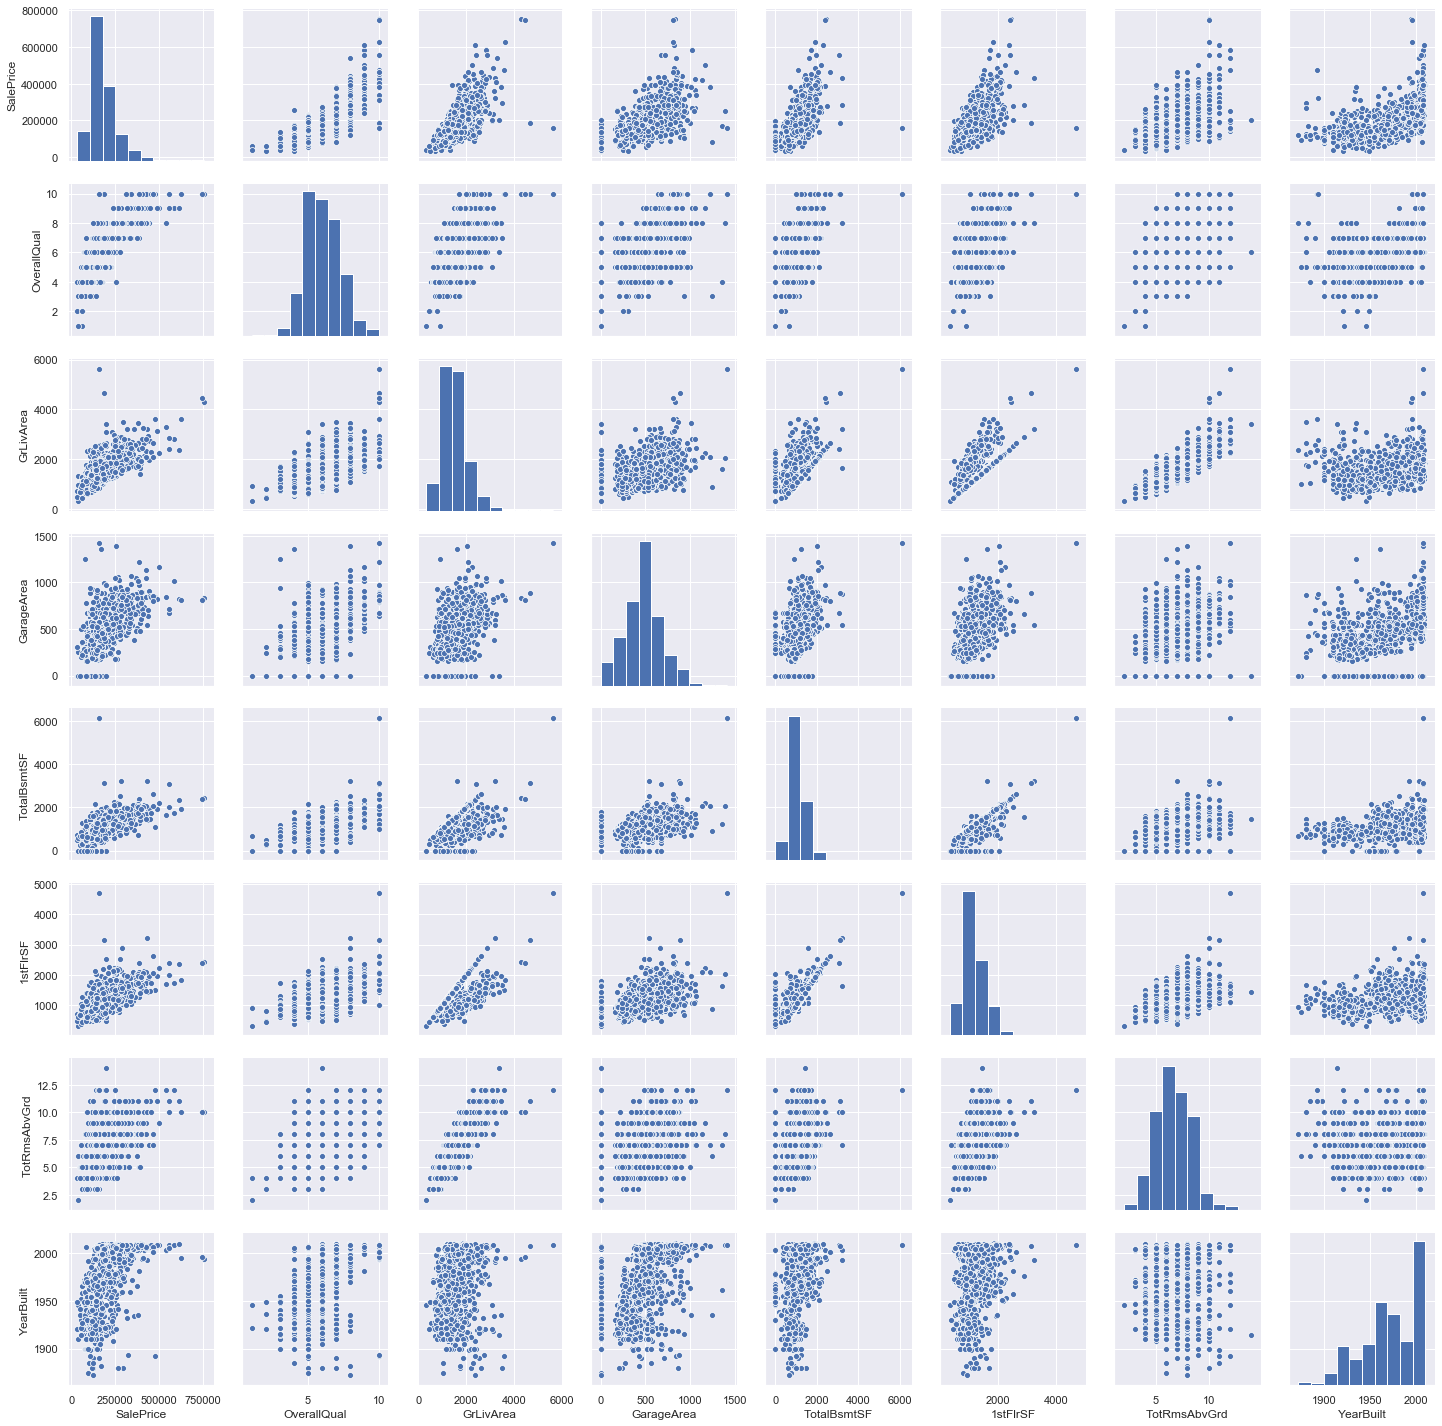

In [12]:
#scatterplot of the above identified top corr features

sns.set()
cols = [ 'SalePrice','OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

# after viewing the scatter plots, I have adjusted the code to remove FullBath and GarageCars - they seem not to give much info

We can confirm the strong correlation. Some of what we are observing is common knowledge, what is interesting is the detail of the relationship The price increase with newer houses, we also see increase as features increase upto to the highest value such as the TotalBsmtSF

### Data Cleaning
- Are there any irregularities in this data set and how do we deal with it?
- Is there missing data and how do we deal with it?
- Do we have any duplicate entries that we need to delete?
- Do we have columns that will be irrelevant to our analysis that we may need to delete such as Id?
- Do we have outliers that can affect our analysis, and how do we deal with it?

In [14]:
# We have identified missing values in various columns in our previous codes
# Lets see missing values in an assending order
# adjust count to only show values with missing data
# are the features among the most corr or least corr

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/1460).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Lets reveiw all the variables with missing data

We should consider dropping variables with more than 50% missing values. Looking at the first 5 variables with close to 50% and above,and compare it with the corr table we can conclude that these varibles are of no much value to our analysis : PoolQC,MiscFeature, Alley, Fence, FireplaceQu. Hence decision to delete.

The garage variables have the same # of missing data, possibly the same observations. .

For the rest of the variables lets replace with a median apart from electrical which has only one missing observation which we are going to delete

In [15]:
# drop the null observation in Electrical 
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [16]:
# drop all columns with null
# Note for better performance, we will review this section

train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)

In [17]:
# train shape at this point
train.shape

(1459, 63)

In [18]:
# 2. check for duplicates entries, in Id
# If duplicates. . delete
# drop Id column since we will not need to use it in our analysis

id_unique = len(set(train.Id))
id_total = train.shape[0]
id_dup = id_total - id_unique
print(id_dup)

#drop id column
train.drop(['Id'],axis =1,inplace=True)

# no duplicates :-)

0


In [19]:
# check the shape of the train dataset at this point
train.shape

(1459, 62)

In [20]:
# Outliers
# data values 1.5 times the interquartile range above the third quartile or below the first quartile - IQR rule

# outliers in price

In [21]:
stat = train.SalePrice.describe()

IQR = stat ['75%'] - stat ['25%']
upper = stat ['75%'] + 1.5 * IQR
lower = stat ['25%'] - 1.5 * IQR
print ('The lower and upper bound for suspected outliers in SalePrice are {} and {},'. format (upper, lower))

The lower and upper bound for suspected outliers in SalePrice are 340075.0 and 3875.0,


In [22]:
train[train.SalePrice == 3875.0]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [23]:
train[train.SalePrice > 340075]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,60,RL,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,0,7,2006,New,Partial,345000
53,20,RL,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,...,0,0,0,0,0,11,2006,WD,Normal,385000
58,60,RL,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,...,37,0,0,0,0,10,2006,New,Partial,438780
112,60,RL,9965,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,168,0,0,10,2007,New,Partial,383970
151,20,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,0,1,2008,New,Partial,372402
161,60,RL,13688,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,0,3,2008,WD,Normal,412500
178,20,RL,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,...,0,0,0,0,0,7,2009,New,Partial,501837
185,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,410,0,0,6,2006,WD,Normal,475000
224,20,RL,13472,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,0,6,2009,WD,Normal,386250
231,60,RL,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,...,202,0,0,0,0,7,2009,WD,Normal,403000


lets not drop these observations since we may loose alot of information. Also, looking at the price corr to other feature graphs, the expensive house also rate high on other features hence may not be outliers as such. Note: This is an area we can review for better outcome

In [24]:
train.duplicated().sum()

0

### Feature Engineering

In [25]:
#get dummies for categorical data
train = pd.get_dummies(train)

In [26]:
# Display the first 5 rows of the last 12 columns to confirm that categorical features been converted to numerical 0 & 1
train.iloc[:,5:].head(5)

,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2003,706,0,150,856,856,854,0,1710,1,...,0,0,0,1,0,0,0,0,1,0
1,1976,978,0,284,1262,1262,0,0,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,2002,486,0,434,920,920,866,0,1786,1,...,0,0,0,1,0,0,0,0,1,0
3,1970,216,0,540,756,961,756,0,1717,1,...,0,0,0,1,1,0,0,0,0,0
4,2000,655,0,490,1145,1145,1053,0,2198,1,...,0,0,0,1,0,0,0,0,1,0


In [27]:
train.shape

(1459, 221)

### Train The Model

In [28]:
# define X and Y axis

X_train = train.drop(['SalePrice'], axis=1)
Y_train = train['SalePrice']

In [29]:
#Use numpy to convert to array
Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

In [30]:
# use decision tree

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(Xtrain, Ytrain)
acc_decision_tree = round(decision_tree.score(Xtrain, Ytrain) * 100, 2)
acc_decision_tree

100.0

In [31]:
# use random forest
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(Xtrain, Ytrain);
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [32]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

71.76

### Make Prediction On The Test Set¶
 Prepare the test set

In [33]:
# drop all features dropped during training

test = test.drop (['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType'], axis =1)

In [34]:
# tst shape at this point
test.shape

(1459, 62)

In [35]:
#get dummies for categorical data
test = pd.get_dummies(test)

### To continue. . . . . 